# Data Scientist Professional Case Study

Congratulations, you have landed your first job as a Data Scientist at National Accessibility! National Accessibility currently installs wheelchair ramps for office buildings and schools. However, the marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed.

The marketing manager would like to know whether you can develop a model to predict whether an event venue has a wheelchair ramp. To help you with this, he has provided you with a dataset of London venues. This data includes whether the venue has a ramp.

It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. Therefore, it is especially important to exclude locations that already have a ramp. Ideally, at least two-thirds of venues predicted to be without a ramp should not have a ramp.

You will need to present your findings in two formats:

* First, you will need to present your findings to the marketing manager via a 10 minute oral presentation. The owner has no technical data science background.
* You will also need to submit a technical report to your data science manager, who does have a strong technical data science background.

### Dataset


The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`


# <div align="center">Analyse and predict whether an event venue has a wheelchair ramp</div>
<img src="https://assets-global.website-files.com/5f99e22b2469ae24190903bd/602e2b9b6344f1cd763c321c_configure-ramps-3.jpg" width="600" height="300" alt="logo">

# Work Plan

My goal in this project is to explore, analyze and develop a model to predict whether an event venue has a wheelchair ramp. The steps I followed to resolve the issue are as follows:

1. Data overview.
2. Exploration Analysis of the raw data set.
3. Model Development and Model Evaluation.
4. Model Testing.
5. Summary of model.
6. Recommendation for future work.

# 1. Data overview

## 1.1 Dataset description 

**<div align="center"> Table 1. Raw dataset description</div>**
<div align="center">
<table style="border: 1px solid black; text-align:center">
  <tr style="border: 1px solid black; text-align:center">
    <th style="border: 1px solid black; text-align:center">Column Name</th>
    <th style="border: 1px solid black; text-align:center">Details</th>

    
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">venue_name</td>
    <td style="border: 1px solid black; text-align:center">Character, name of the venue.</td>
    
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Loud music / events</td>
    <td style="border: 1px solid black; text-align:center">Character, whether the venue hosts loud events (True) or not (False)</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Venue provides alcohol </td>
    <td style="border: 1px solid black; text-align:center">Numeric, whether the venue provides alcohol (1) or not (0).</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Wi-Fi</td>
    <td style="border: 1px solid black; text-align:center">Character, whether the venue provides wi-fi (True) or not (False).</td>
  </tr>
    <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">supervenue</td>
    <td style="border: 1px solid black; text-align:center">Character, whether the venue qualifies as a supervenue (True) or not (False).</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">U-Shaped_max</td>
    <td style="border: 1px solid black; text-align:center">Numeric, the total capacity of the u-shaped portion of the theatre.</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">max_standing</td>
    <td style="border: 1px solid black; text-align:center">Numeric, the total standing capacity of the venue.</td>
  </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Theatre_max </td>
    <td style="border: 1px solid black; text-align:center">Numeric, the total capacity of the theatre.</td>
  </tr>
   </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Promoted / ticketed events</td>
    <td style="border: 1px solid black; text-align:center">Character, whether the venue hosts promoted/ticket events (True) or not (False).</td>
  </tr>
   </tr>
  <tr style="border: 1px solid black; text-align:center">
    <td style="border: 1px solid black; text-align:center">Wheelchair accessible</td>
    <td style="border: 1px solid black; text-align:center">Character, whether the venue is wheelchair accessible (True) or not (False).</td>
  </tr>
    </tr>

  </tr>
</table>
</div>

In [118]:
# Importing libraries

import keras
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split

pd.set_option("display.precision",2)
plt.style.use("fivethirtyeight")

In [119]:
# import data from "data/event_venues.csv"
venues = pd.read_csv("data/event_venues.csv")

# printing the first 5 values of event_venue data
venues.head(20)

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.05,0,112.72,False,False
1,green rooms hotel,True,1,True,False,40.00,120,80.00,True,False
2,148 leadenhall street,False,0,True,False,35.05,0,112.72,False,False
3,conway hall,False,0,True,False,35.05,60,60.00,False,False
4,gridiron building,False,0,True,False,35.05,0,112.72,False,False
5,kimpton fitzroy london,True,1,True,False,6.00,0,112.72,True,False
6,lloyds avenue,False,0,True,False,35.05,0,112.72,False,False
7,public space | members-style bar & dining,True,1,True,False,35.05,200,112.72,False,False
8,16 old queen street,False,0,True,False,35.05,0,112.72,False,False
9,siorai bar,True,1,True,False,35.05,180,20.00,True,False


In [120]:
venues.shape

(3910, 10)

In [121]:
venues.describe()

,Venue provides alcohol,U-Shaped_max,max_standing,Theatre_max
count,3910.00,3910.00,3910.00,3910.00
mean,0.71,35.05,114.20,112.72
std,0.45,43.94,272.27,131.85
min,0.00,1.00,0.00,1.00
25%,0.00,35.05,0.00,80.00
50%,1.00,35.05,50.00,112.72
75%,1.00,35.05,120.00,112.72
max,1.00,2520.00,7500.00,4000.00


## 1.2 Handling missing values


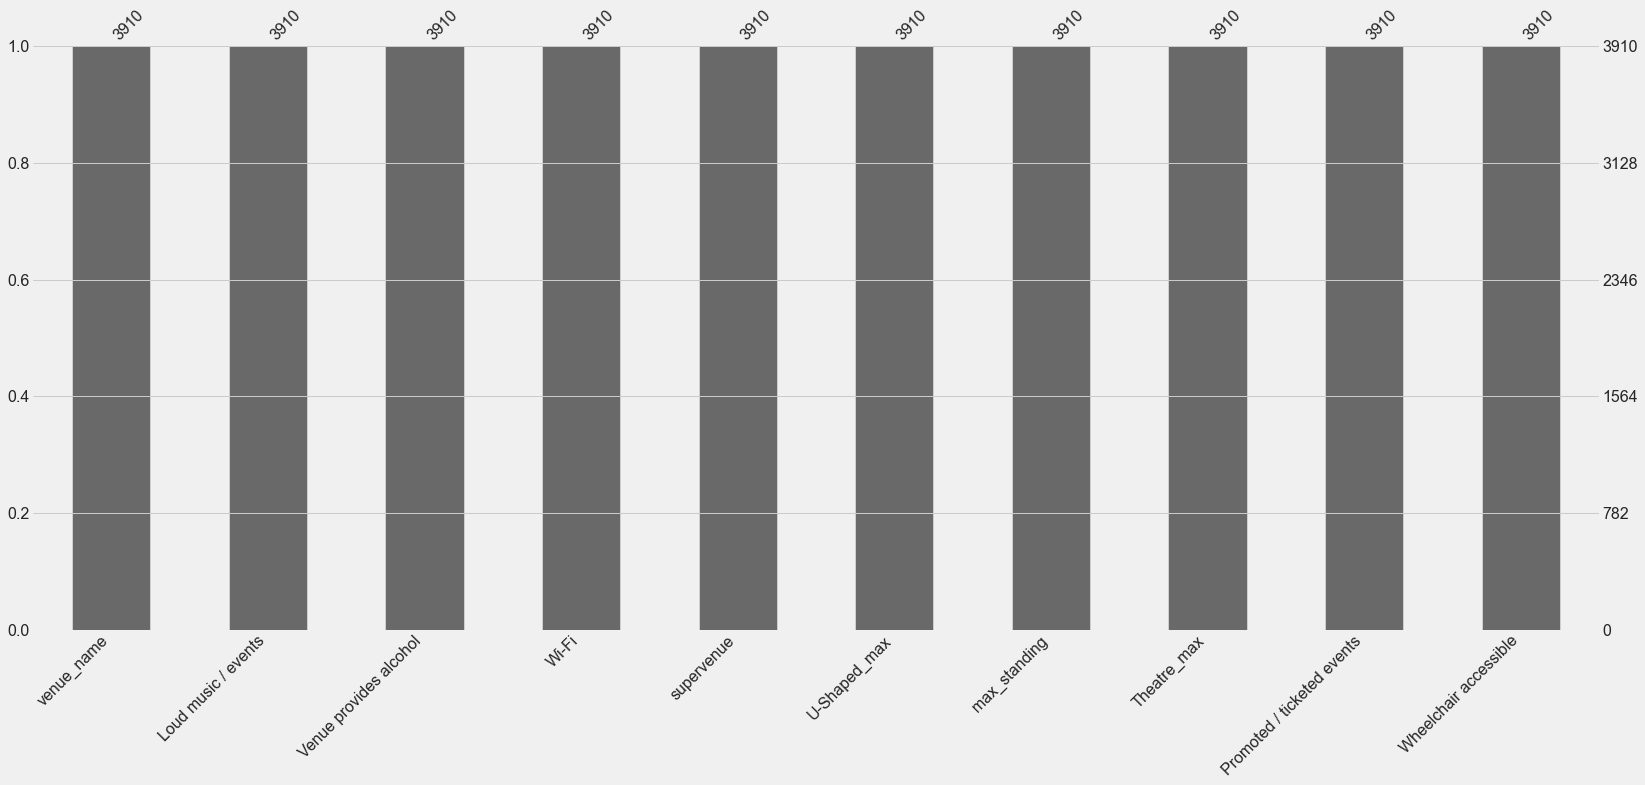

In [122]:
msno.bar(venues)
plt.savefig('missing_values.jpeg')
plt.show()

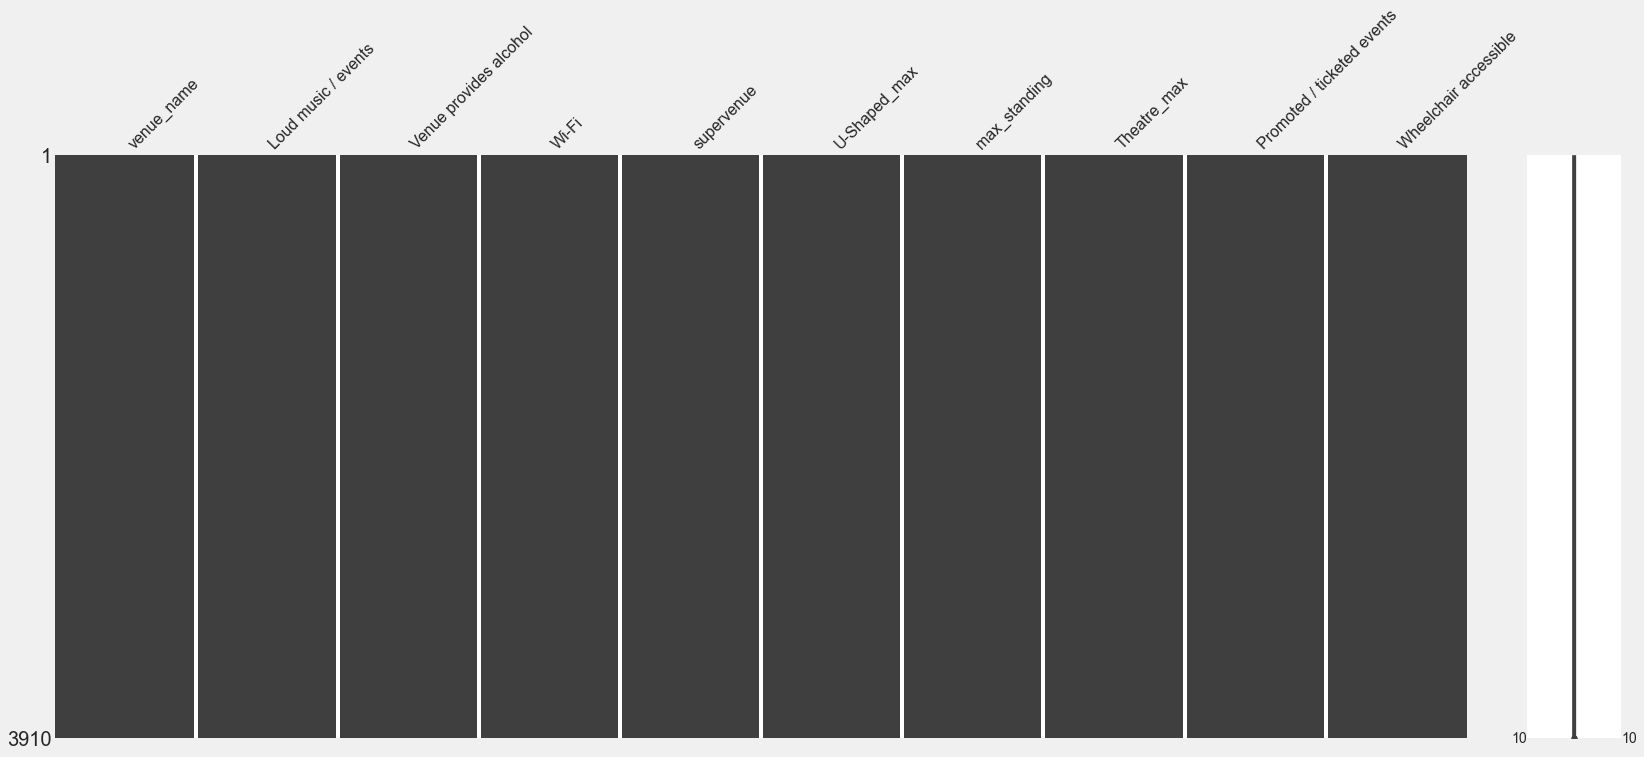

In [123]:
msno.matrix(venues)
plt.show()

In [124]:
# Checking the missing values
venues.isnull().sum()

venue_name                    0
Loud music / events           0
Venue provides alcohol        0
Wi-Fi                         0
supervenue                    0
U-Shaped_max                  0
max_standing                  0
Theatre_max                   0
Promoted / ticketed events    0
Wheelchair accessible         0
dtype: int64

In [125]:
# Clean Bool format so process

def bool_mapper (venues, column):
    venues[column] = venues[column].map({True: 1,False: 0})
    return venues

bool_mapper (venues, 'supervenue')
bool_mapper (venues, 'Loud music / events')
bool_mapper (venues, 'Promoted / ticketed events')
bool_mapper (venues, 'Wheelchair accessible')
bool_mapper (venues, 'Wi-Fi')

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,0,0,1,0,35.05,0,112.72,0,0
1,green rooms hotel,1,1,1,0,40.00,120,80.00,1,0
2,148 leadenhall street,0,0,1,0,35.05,0,112.72,0,0
3,conway hall,0,0,1,0,35.05,60,60.00,0,0
4,gridiron building,0,0,1,0,35.05,0,112.72,0,0
...,...,...,...,...,...,...,...,...,...,...
3905,the hurlingham club,1,1,1,0,40.00,450,450.00,0,1
3906,"landmark - aldgate, london",0,0,1,0,28.00,0,28.00,0,1
3907,ortus conference and events venue,0,1,1,0,13.00,20,20.00,0,1
3908,30 euston square,0,1,1,0,8.00,20,20.00,0,1


## 1.3 Split dataset into training set and test set

In [ ]:
# Split into X, y

X = venues.drop(['Wheelchair accessible', 'venue_name'], axis = 1)
y = venues['Wheelchair accessible']

# Split data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=42)

# Dataset Merged for exploration

X['Wheelchair'] = y
data = X.copy()

# print the train and test data

print("X_train dataset length", len(X_train))
print("X_test dataset length", len(X_test))
print("y_train dataset length", len(y_train))
print("y_test dataset length", len(y_test))

X_train dataset length 2737
X_test dataset length 1173
y_train dataset length 2737
y_test dataset length 1173


# 2. Exploration Analysis of the raw data set.

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate.

## 2.1 Data Composition

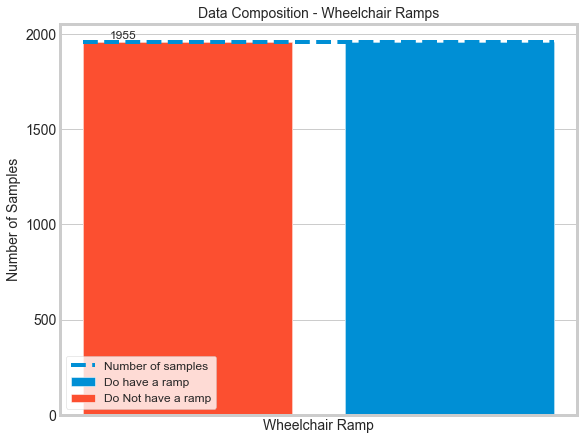

In [127]:
# Wheelchair access
sns.set_style('whitegrid')

# Declare axes
figg = plt.figure(figsize = (8, 6), constrained_layout = True)
ax = figg.subplots()

# Values

def plot_bars (col):
    return plt.bar(data['Wheelchair'][data['Wheelchair']==col ], height = data['Wheelchair'].value_counts() [col] )

plot_bars(1)
plot_bars(0)

# Parametres
plt.xticks(np.arange(250,2500,500))
plt.yticks(np.arange(0,2500,500))
plt.xlabel("Wheelchair Ramp", fontsize = 14)
plt.ylabel("Number of Samples", fontsize = 14)
plt.hlines(1955, -0.4, 1.4, linestyles = 'dashed')
plt.annotate('1955',(-0.3,1975), size = 12)
plt.title('Data Composition - Wheelchair Ramps', fontsize = 14)
plt.legend(['Number of samples','Do have a ramp','Do Not have a ramp'], loc = 3, fontsize = 12)

# Show
plt.show()

Event venues dataset has the same numbers of samples that compose the sample are similar for both cases (1955).

## 2.2 Understanding the data set - Variable correlations

In [128]:
# Correlation matrix
corr_matrix = data.corr()

# print
print("Wheelchair ramp correlation: \n")
print(corr_matrix["Wheelchair"].sort_values(ascending=False))

Wheelchair ramp correlation: 

Wheelchair                    1.00
Promoted / ticketed events    0.16
Venue provides alcohol        0.14
max_standing                  0.14
Theatre_max                   0.09
Wi-Fi                         0.08
Loud music / events           0.04
U-Shaped_max                  0.02
supervenue                   -0.10
Name: Wheelchair, dtype: float64


According to this data, variables which seems to be predictor are **Promoted / ticketed events (0.16)**, **Venue provides alcohol (0.14)**, **max_standing (0.14)**, and having a negative correlation, **supervenue (-0.1)**.

A table showing the overall wheelchain ramp correlation within each variable is set out below:

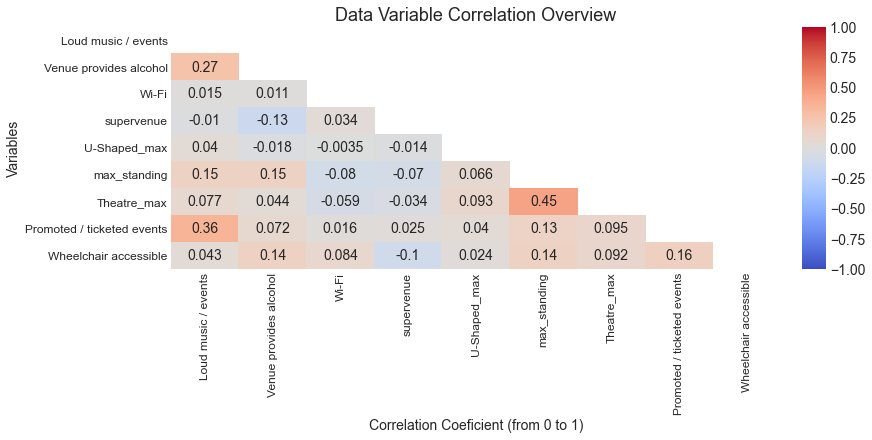

In [129]:
# Heatmap
figg = plt.figure(figsize = (12,6), constrained_layout = True)
ax = figg.subplots()

# For cleaner index and ticks
venues_heat = venues.copy()

# Plot Corpus
upp_mat = np.triu(venues.corr())

sns.heatmap(venues_heat.corr(), vmin = -1, vmax = +1, annot = True,
            cmap = "coolwarm",annot_kws = {'size':14}, mask = upp_mat)

# Appareance
plt.title("Data Variable Correlation Overview", fontsize = 18)
plt.ylabel("Variables", fontsize = 14)
plt.yticks(fontsize = 12)
plt.xlabel("Correlation Coeficient (from 0 to 1)", fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)

# Show
plt.show()

## 2.3 Correlation p-significance

In [130]:
# p-value 
p_list = []

def p_value_wchair(cols):
    for col in cols:
        r, p = stats.pearsonr(data['Wheelchair'], data[col])
        p_list.append( p )
        print('Variable', col, 'p value: ', p)
        
p_value_wchair(data.columns[1:-1])

Variable Venue provides alcohol p value:  3.2202991977858834e-18
Variable Wi-Fi p value:  1.5022795683491803e-07
Variable supervenue p value:  1.9991616526903284e-10
Variable U-Shaped_max p value:  0.1293853790383352
Variable max_standing p value:  7.078254512588652e-18
Variable Theatre_max p value:  8.655567380058508e-09
Variable Promoted / ticketed events p value:  1.6549428075424375e-24


A table showing the overall p-correlation within each variable is set out below:

[]

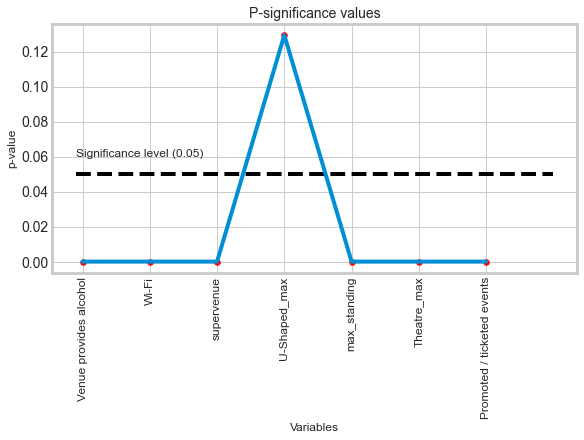

In [131]:
# Declare axes
figg = plt.figure(figsize = (8, 6), constrained_layout = True)
ax = figg.subplots()

# corpus
plt.plot(p_list)
plt.scatter(data.columns[1:-1], p_list, color = 'r', zorder = 2)


# lines
plt.hlines(0.05, -0.1, 7, linestyles = 'dashed', color = 'black')
plt.annotate('Significance level (0.05)',(-0.1,0.06), size = 12)

# params
plt.title("P-significance values", fontsize = 14)
plt.xticks(range(0,len(data.columns[1:-1])), data.columns[1:-1], rotation = 90, fontsize = 12)
plt.ylabel("p-value", fontsize = 12)
plt.xlabel("Variables", fontsize = 12)

# plot
plt.plot()

According to p-value, all variables except **'U-shaped_max' are significatly correlated** to the target variable.

In [132]:
# Drop the uncorrelated variable

X_train = X_train.drop('U-Shaped_max', axis=1)
X_test = X_test.drop('U-Shaped_max', axis=1)

# 3. Model Development and Evaluation.
## 3.1 Deep Neural Network
Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.

In [133]:
# Deep Neural Network

model = Sequential([
    Dense(64, input_dim=7, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='sigmoid'),
    Dense(8, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

In [134]:
# Model compilation

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
# Model summary 

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                512       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [136]:
# Model fit

epochs = 100

model.fit(
    X_train,
    y_train,
    epochs=epochs,
)

Epoch 1/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2730 - binary_accuracy: 0.5122
Epoch 2/100
86/86 [==============================] - 0s 1ms/step - loss: 0.2520 - binary_accuracy: 0.5122
Epoch 3/100
86/86 [==============================] - 0s 1ms/step - loss: 0.2491 - binary_accuracy: 0.5122
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2471 - binary_accuracy: 0.5122
Epoch 5/100
86/86 [==============================] - 0s 1ms/step - loss: 0.2468 - binary_accuracy: 0.5747
Epoch 6/100
86/86 [==============================] - 0s 1ms/step - loss: 0.2455 - binary_accuracy: 0.6050
Epoch 7/100
86/86 [==============================] - 0s 1ms/step - loss: 0.2435 - binary_accuracy: 0.6043
Epoch 8/100
86/86 [==============================] - 0s 1ms/step - loss: 0.2416 - binary_accuracy: 0.6043
Epoch 9/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2400 - binary_accuracy: 0.6113
Epoch 10/100
86/86 [==========================

## 3.2 Model Evaluation

In [137]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

37/37 [==============================] - 0s 822us/step - loss: 0.2404 - binary_accuracy: 0.6155

binary_accuracy: 61.55%


In [138]:
pred = model.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, pred)))
r2 = metrics.r2_score(y_test, pred)
explained_variance = metrics.explained_variance_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
print('Explained Variance Score: {:.2f}'.format(explained_variance))

Testing performance
RMSE: 0.49
R2: 0.04
Explained Variance Score: 0.07


This model after tunning the parameters achieved a **root mean squared error of 0.49** and an **R2 score of 0.04** which is very good.

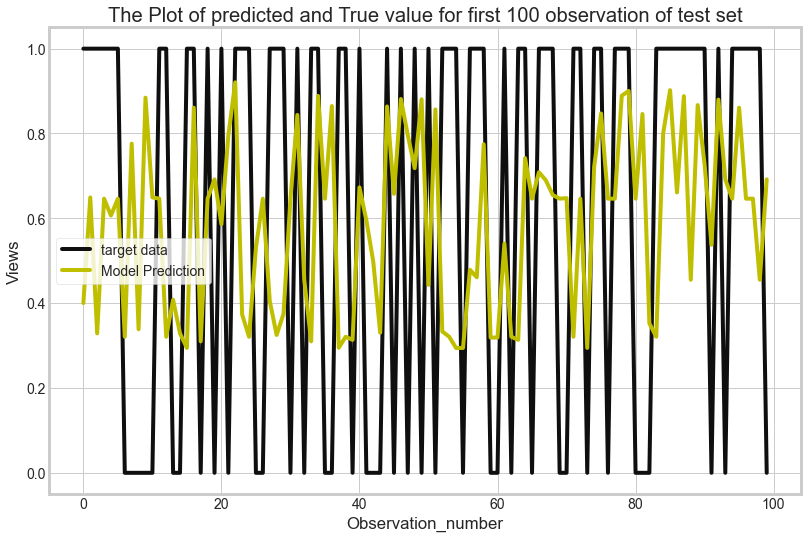

In [139]:
# plotting the first 200 prediction and test value

obs = list(range(100))
plt.figure(figsize=(12,8))
plt.plot(obs,y_test[0:100], color='#0f0f0f', label='target data')

plt.plot(obs, pred[0:100], color='y', label='Model Prediction')
plt.xlabel('Observation_number')
plt.ylabel('Views')
plt.legend()
plt.title('The Plot of predicted and True value for first 100 observation of test set')
plt.savefig('plotperformance.jpeg')
plt.show()

In [140]:
X_results = X.drop(['Wheelchair', 'U-Shaped_max'], axis = 1)

Text(0.5, -1.340000000000014, 'Predicted label')

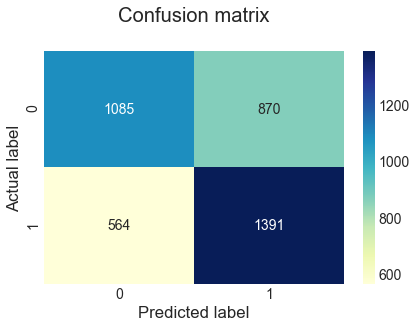

In [141]:
y_pred = np.round(model.predict(X_results))

cnf_matrix = metrics.confusion_matrix(y, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [142]:
venues['Wheelchair accessible'].value_counts()/3

0    651.67
1    651.67
Name: Wheelchair accessible, dtype: float64

Its **score has achieved the +2/3 requirement** TP 1391, FP 564 (< 651 limit error allowed).

Based on: "at least two-thirds of venues predicted to be without a ramp should not have a ramp."

## 3.3 Feature Importance
<img src="Feature_importance.png" width="800" height="400" alt="logo">

## 3.4 Save the model

In [146]:
# searlize the model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize the weights to HDF5
model.save_weights("wheelchairr_predictor.h5")
print("Jorr Se bolo Jai Mata Di!")

Jorr Se bolo Jai Mata Di!


# 4. Model Testing

In [ ]:
# model prediction

venues['prediction'] = np.round(model.predict(venues.drop(['Wheelchair accessible','venue_name','U-Shaped_max'], axis = 1))).astype(int)

In [151]:
venues

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible,prediction
0,techspace aldgate east,0,0,1,0,35.05,0,112.72,0,0,0
1,green rooms hotel,1,1,1,0,40.00,120,80.00,1,0,1
2,148 leadenhall street,0,0,1,0,35.05,0,112.72,0,0,0
3,conway hall,0,0,1,0,35.05,60,60.00,0,0,1
4,gridiron building,0,0,1,0,35.05,0,112.72,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3905,the hurlingham club,1,1,1,0,40.00,450,450.00,0,1,1
3906,"landmark - aldgate, london",0,0,1,0,28.00,0,28.00,0,1,0
3907,ortus conference and events venue,0,1,1,0,13.00,20,20.00,0,1,1
3908,30 euston square,0,1,1,0,8.00,20,20.00,0,1,1


# 5. Summary of model

The model chosen in this research is simple 5 layers Neural Network model because it handels well the categorical variables.The Neural Network model after tunning achieved an RMSE of 0.49 and R2 of 0.04.

Max Standing, Venue provide alcohol and Venue name are the most important features that impact the model's predictive performance followed by Wheelchair accesible. On the other hand, Wi-Fi and Supervenue had the lowest predictive power.

Since on the objective of this research work is also to access prediction performance of at least two-thirds of venues predicted to be without a ramp should not have a ramp.

# 6. Recommendation for future work

* Model accuracy can improve after hyperparameter tuning and think carefully about which features to include in the model, and how they should be represented.
* We can deploy it and host the application in the cloud using Microsoft Azure to demonstrate.
* In case of time series data, We can focus on more features like date, venue area,max wheelchair handicapped.